<a href="https://colab.research.google.com/github/DarshanSuresh/Academic_Stress_Levels_in_UG_Students_using_ML_Models/blob/main/Git_Fork01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Corrected Code for Stress Analysis - Meditation and Academic Stress

import pandas as pd
import numpy as np

# Step 1: Load the CSV File
file_path = "/content/Research Paper Data Collection (UG) - Meditation and Academic Stress - Main.csv"
df = pd.read_csv(file_path, encoding='utf-8', on_bad_lines='skip')

# Step 2: Select Relevant Columns (with corrected column names)
# Note: The column names don't have prefixes like "A." and "B." in the actual dataset
cols = [
    "Enter your Gender",
    "Frequency of Meditation:",
    "PRE1. I feel stressed about academic deadlines and exams.",
    "POST1. I feel stressed about academic deadlines and exams."
]
data = df[cols].copy()

# Step 3: Clean the Data
data = data.dropna()
data.rename(columns={
    "Frequency of Meditation:": "Meditation_Frequency",
    "PRE1. I feel stressed about academic deadlines and exams.": "Stress_Pre",
    "POST1. I feel stressed about academic deadlines and exams.": "Stress_Post"
}, inplace=True)

# Step 4: The stress levels are already encoded as numbers (1-5 scale)
# No need for manual encoding - the data is already numerical

# Step 5: Compute Average Reduction in Stress
data["Stress_Change"] = data["Stress_Post"] - data["Stress_Pre"]
avg_change = data["Stress_Change"].mean()

print("=" * 80)
print("                       STRESS ANALYSIS RESULTS")
print("=" * 80)
print()
print("🔹 Average Stress Change (Post - Pre):", round(avg_change, 2))
print()

if avg_change < 0:
    print("🧘 Meditation seems to reduce stress on average.")
    print(f"   The average stress reduction is {abs(round(avg_change, 2))} points on a 5-point scale.")
elif avg_change > 0:
    print("⚠️ Stress increased slightly post meditation.")
    print(f"   The average stress increase is {round(avg_change, 2)} points on a 5-point scale.")
else:
    print("ℹ️ No significant change in stress levels observed.")

print()
print("=" * 80)
print()

# Additional statistics
print("📊 DETAILED STATISTICS:")
print("-" * 80)
print(f"   • Average PRE-meditation stress:  {round(data['Stress_Pre'].mean(), 2)}")
print(f"   • Average POST-meditation stress: {round(data['Stress_Post'].mean(), 2)}")
print(f"   • Total respondents analyzed:     {len(data)}")
print()

# Count how many people experienced reduction, increase, or no change
reduced = (data["Stress_Change"] < 0).sum()
increased = (data["Stress_Change"] > 0).sum()
no_change = (data["Stress_Change"] == 0).sum()

print("📈 STRESS CHANGE DISTRIBUTION:")
print("-" * 80)
print(f"   • Stress REDUCED:    {reduced} respondents ({round(reduced/len(data)*100, 1)}%)")
print(f"   • Stress INCREASED:  {increased} respondents ({round(increased/len(data)*100, 1)}%)")
print(f"   • NO CHANGE:         {no_change} respondents ({round(no_change/len(data)*100, 1)}%)")
print()
print("=" * 80)

# Analysis by Meditation Frequency
print()
print("=" * 80)
print("         STRESS REDUCTION BY MEDITATION FREQUENCY")
print("=" * 80)
print()
freq_analysis = data.groupby("Meditation_Frequency").agg({
    "Stress_Change": ["mean", "count"],
    "Stress_Pre": "mean",
    "Stress_Post": "mean"
}).round(2)
print(freq_analysis)
print()

# Analysis by Gender
print("=" * 80)
print("              STRESS REDUCTION BY GENDER")
print("=" * 80)
print()
gender_analysis = data.groupby("Enter your Gender").agg({
    "Stress_Change": ["mean", "count"],
    "Stress_Pre": "mean",
    "Stress_Post": "mean"
}).round(2)
print(gender_analysis)
print()
print("=" * 80)


                       STRESS ANALYSIS RESULTS

🔹 Average Stress Change (Post - Pre): -0.34

🧘 Meditation seems to reduce stress on average.
   The average stress reduction is 0.34 points on a 5-point scale.


📊 DETAILED STATISTICS:
--------------------------------------------------------------------------------
   • Average PRE-meditation stress:  3.5
   • Average POST-meditation stress: 3.16
   • Total respondents analyzed:     351

📈 STRESS CHANGE DISTRIBUTION:
--------------------------------------------------------------------------------
   • Stress REDUCED:    122 respondents (34.8%)
   • Stress INCREASED:  38 respondents (10.8%)
   • NO CHANGE:         191 respondents (54.4%)


         STRESS REDUCTION BY MEDITATION FREQUENCY

                     Stress_Change       Stress_Pre Stress_Post
                              mean count       mean        mean
Meditation_Frequency                                           
0 days/week                  -0.26    95       3.35        3.0

In [4]:
import pandas as pd
import numpy as np
import re
import os

# File path - use the correct filename
file_path = "/content/Research Paper Data Collection (UG) - Meditation and Academic Stress - Main.csv"

# 1) Load the CSV WITHOUT skiprows (the issue is skiprows=3 is skipping important header rows)
df = pd.read_csv(file_path, encoding='utf-8', on_bad_lines='skip')
print("Loaded rows,cols:", df.shape)
print("\nFirst 5 column names:")
for i, col in enumerate(df.columns[:10], 1):
    print(f"  {i}. {col}")
print("\n...")
print("\nColumns containing 'PRE':")
pre_related = [c for c in df.columns if 'PRE' in c.upper()]
for col in pre_related:
    print(f"  - {col}")
print("\nColumns containing 'POST':")
post_related = [c for c in df.columns if 'POST' in c.upper()]
for col in post_related:
    print(f"  - {col}")


Loaded rows,cols: (351, 49)

First 5 column names:
  1. Submission ID
  2. Respondent ID
  3. Submitted at
  4. Enter your age
  5. Enter your Gender
  6. Program of Study
  7. Semester
  8. Program/Course
  9. Program Other Field
  10. Prior Meditation Experience:

...

Columns containing 'PRE':
  - PRE1. I feel stressed about academic deadlines and exams.
  - PRE2. I struggle to concentrate on studies due to stress.
  - PRE3. Meditation does not help reduce my stress.
  - PRE4. I often feel anxious before tests or assignments.
  - PRE5. I can manage multiple academic tasks without feeling overwhelmed.
  - PRE6. Stress negatively affects my academic performance.
  - PRE7. I feel calm and focused during study sessions.

Columns containing 'POST':
  - POST1. I feel stressed about academic deadlines and exams.
  - POST2. I struggle to concentrate on studies due to stress.
  - POST3. Meditation does not help reduce my stress.
  - POST4. I often feel anxious before tests or assignments.
  

In [6]:

# Now let's create the corrected continuation code

import pandas as pd
import numpy as np
import re
import os

# File path - IMPORTANT: Remove skiprows=3 to load the data correctly
file_path = "/content/Research Paper Data Collection (UG) - Meditation and Academic Stress - Main.csv"

# 1) Load the CSV (without skiprows)
df = pd.read_csv(file_path, encoding='utf-8', on_bad_lines='skip')
print("✅ Loaded rows, cols:", df.shape)
print("\n" + "="*80 + "\n")

# 2) Detect PRE/POST item columns
pre_cols = [c for c in df.columns if c.strip().upper().startswith('PRE')]
post_cols = [c for c in df.columns if c.strip().upper().startswith('POST')]

print("✅ Detected PRE cols:", len(pre_cols))
for col in pre_cols:
    print(f"   - {col}")
print()
print("✅ Detected POST cols:", len(post_cols))
for col in post_cols:
    print(f"   - {col}")
print("\n" + "="*80 + "\n")

# 3) Create numeric treatment & outcome variables
# Map frequency text -> numeric days/week
def freq_to_days(val):
    if pd.isna(val):
        return np.nan
    s = str(val).lower()
    if 'daily' in s or 'everyday' in s:
        return 7.0
    if '5-6' in s:
        return 5.5
    if '3-4' in s or '3 - 4' in s or '3 to 4' in s:
        return 3.5
    if '1-2' in s or '1 - 2' in s or '1 to 2' in s:
        return 1.5
    if 'none' in s or '0' in s or 'never' in s:
        return 0.0
    if 'rare' in s:
        return 0.3
    if 'occasional' in s:
        return 1.5
    if 'frequent' in s:
        return 4.0
    if 'weekly' in s:
        m = re.search(r'(\d+)', s)
        return float(m.group(1)) if m else 1.0
    m = re.search(r'(\d+(\.\d+)?)', s)
    if m:
        return float(m.group(1))
    return np.nan

# Find the frequency column (corrected name)
freq_col = "Frequency of Meditation:"
if freq_col not in df.columns:
    freq_candidates = [c for c in df.columns if 'frequency' in c.lower()]
    freq_col = freq_candidates[0] if freq_candidates else None

if freq_col:
    df['meditation_freq_days'] = df[freq_col].apply(freq_to_days)
    print(f"✅ Created 'meditation_freq_days' from column: {freq_col}")
    print(f"   Unique values: {sorted(df['meditation_freq_days'].dropna().unique())}")
else:
    df['meditation_freq_days'] = np.nan
    print("⚠️ Frequency column not found")

print("\n" + "="*80 + "\n")

# Map average duration text -> minutes numeric
dur_col = "Average Duration of each meditation session:"
def duration_to_min(x):
    if pd.isna(x): return np.nan
    s = str(x).lower()
    if '<5' in s or 'less than 5' in s: return 2.5
    if '5-15' in s or '5 - 15' in s: return 10
    if '15-30' in s: return 22.5
    if '30-60' in s: return 45
    if '>60' in s or 'more than 60' in s: return 75
    m = re.search(r'(\d+)', s)
    return float(m.group(1)) if m else np.nan

if dur_col in df.columns:
    df['meditation_dur_min'] = df[dur_col].apply(duration_to_min)
    print(f"✅ Created 'meditation_dur_min' from column: {dur_col}")
    print(f"   Unique values: {sorted(df['meditation_dur_min'].dropna().unique())}")
else:
    df['meditation_dur_min'] = np.nan
    print("⚠️ Duration column not found")

print("\n" + "="*80 + "\n")

# Build PRE/POST scores (sum of items)
if len(pre_cols) >= 1 and len(post_cols) >= 1:
    # Convert to numeric where possible
    df[pre_cols] = df[pre_cols].apply(pd.to_numeric, errors='coerce')
    df[post_cols] = df[post_cols].apply(pd.to_numeric, errors='coerce')

    # Calculate scores
    df['PRE_score'] = df[pre_cols].sum(axis=1)
    df['POST_score'] = df[post_cols].sum(axis=1)
    df['delta_score'] = df['POST_score'] - df['PRE_score']   # negative = reduced stress

    print("✅ Created PRE/POST scores:")
    print(f"   PRE_score range: {df['PRE_score'].min():.1f} - {df['PRE_score'].max():.1f}")
    print(f"   POST_score range: {df['POST_score'].min():.1f} - {df['POST_score'].max():.1f}")
    print(f"   Average PRE_score: {df['PRE_score'].mean():.2f}")
    print(f"   Average POST_score: {df['POST_score'].mean():.2f}")
    print(f"   Average delta_score: {df['delta_score'].mean():.2f}")
else:
    raise RuntimeError("Could not find PRE/POST columns. Please check column names.")

print("\n" + "="*80 + "\n")

# Target (classification): did stress *decrease* after meditation?
# improved = 1 if POST < PRE (stress decreased)
df['improved'] = (df['POST_score'] < df['PRE_score']).astype(int)

# Inspect class balance
print("✅ Target variable 'improved' created:")
print("\nImproved counts:")
print(df['improved'].value_counts(dropna=False).sort_index())
print()
print("Percentage distribution:")
improved_pct = df['improved'].value_counts(normalize=True, dropna=False).sort_index() * 100
for idx, val in improved_pct.items():
    label = "Did NOT improve (stress same or increased)" if idx == 0 else "IMPROVED (stress decreased)"
    print(f"   {idx}: {label} = {val:.1f}%")

print("\n" + "="*80)
print("✅ Data preparation complete!")
print("="*80)


✅ Loaded rows, cols: (351, 49)


✅ Detected PRE cols: 7
   - PRE1. I feel stressed about academic deadlines and exams.
   - PRE2. I struggle to concentrate on studies due to stress.
   - PRE3. Meditation does not help reduce my stress.
   - PRE4. I often feel anxious before tests or assignments.
   - PRE5. I can manage multiple academic tasks without feeling overwhelmed.
   - PRE6. Stress negatively affects my academic performance.
   - PRE7. I feel calm and focused during study sessions.

✅ Detected POST cols: 7
   - POST1. I feel stressed about academic deadlines and exams.
   - POST2. I struggle to concentrate on studies due to stress.
   - POST3. Meditation does not help reduce my stress.
   - POST4. I often feel anxious before tests or assignments.
   - POST5. I can manage multiple academic tasks without feeling overwhelmed.
   - POST6. Stress negatively affects my academic performance.
   - POST7. I feel calm and focused during study sessions.


✅ Created 'meditation_freq_days' f

In [7]:

# Let's also show some additional statistics and save the processed data

print("\n" + "="*80)
print("          ADDITIONAL STATISTICS & DATA INSIGHTS")
print("="*80 + "\n")

# Check for missing values in key columns
print("Missing values in key variables:")
print(f"   meditation_freq_days: {df['meditation_freq_days'].isna().sum()} ({df['meditation_freq_days'].isna().sum()/len(df)*100:.1f}%)")
print(f"   meditation_dur_min: {df['meditation_dur_min'].isna().sum()} ({df['meditation_dur_min'].isna().sum()/len(df)*100:.1f}%)")
print(f"   PRE_score: {df['PRE_score'].isna().sum()} ({df['PRE_score'].isna().sum()/len(df)*100:.1f}%)")
print(f"   POST_score: {df['POST_score'].isna().sum()} ({df['POST_score'].isna().sum()/len(df)*100:.1f}%)")
print()

# Show distribution of delta_score
print("Delta Score Distribution (POST - PRE):")
print(f"   Negative (improved): {(df['delta_score'] < 0).sum()} students")
print(f"   Zero (no change): {(df['delta_score'] == 0).sum()} students")
print(f"   Positive (worsened): {(df['delta_score'] > 0).sum()} students")
print()

# Improvement by meditation frequency
print("Improvement rate by Meditation Frequency:")
improvement_by_freq = df.groupby('meditation_freq_days')['improved'].agg(['mean', 'count'])
improvement_by_freq['improvement_rate_%'] = (improvement_by_freq['mean'] * 100).round(1)
improvement_by_freq = improvement_by_freq.rename(columns={'mean': 'improvement_rate', 'count': 'n_students'})
print(improvement_by_freq[['n_students', 'improvement_rate_%']])
print()

# Improvement by meditation duration
print("Improvement rate by Meditation Duration:")
improvement_by_dur = df.groupby('meditation_dur_min')['improved'].agg(['mean', 'count'])
improvement_by_dur['improvement_rate_%'] = (improvement_by_dur['mean'] * 100).round(1)
improvement_by_dur = improvement_by_dur.rename(columns={'mean': 'improvement_rate', 'count': 'n_students'})
print(improvement_by_dur[['n_students', 'improvement_rate_%']])

print("\n" + "="*80)



          ADDITIONAL STATISTICS & DATA INSIGHTS

Missing values in key variables:
   meditation_freq_days: 0 (0.0%)
   meditation_dur_min: 0 (0.0%)
   PRE_score: 0 (0.0%)
   POST_score: 0 (0.0%)

Delta Score Distribution (POST - PRE):
   Negative (improved): 168 students
   Zero (no change): 64 students
   Positive (worsened): 119 students

Improvement rate by Meditation Frequency:
                      n_students  improvement_rate_%
meditation_freq_days                                
0.0                           95                49.5
1.5                          188                47.3
3.5                           45                53.3
5.5                           14                42.9
7.0                            9                22.2

Improvement rate by Meditation Duration:
                    n_students  improvement_rate_%
meditation_dur_min                                
2.5                        149                42.3
10.0                       149                53

In [10]:

# Create the complete corrected code file for the user
# Corrected Code for Meditation & Academic Stress Analysis
# Including data loading, preprocessing, and feature engineering

import pandas as pd
import numpy as np
import re
import os

# ============================================================================
# STEP 1: LOAD THE CSV FILE
# ============================================================================
# IMPORTANT: Remove skiprows=3 - it was causing the header row to be skipped!
file_path = "/content/Research Paper Data Collection (UG) - Meditation and Academic Stress - Main.csv"

# Load the CSV
df = pd.read_csv(file_path, encoding='utf-8', on_bad_lines='skip')
print("✅ Loaded rows, cols:", df.shape)
print("\\n" + "="*80 + "\\n")

# ============================================================================
# STEP 2: DETECT PRE/POST ITEM COLUMNS
# ============================================================================
pre_cols = [c for c in df.columns if c.strip().upper().startswith('PRE')]
post_cols = [c for c in df.columns if c.strip().upper().startswith('POST')]

print("✅ Detected PRE cols:", len(pre_cols))
for col in pre_cols:
    print(f"   - {col}")
print()
print("✅ Detected POST cols:", len(post_cols))
for col in post_cols:
    print(f"   - {col}")
print("\\n" + "="*80 + "\\n")

# ============================================================================
# STEP 3: CREATE NUMERIC TREATMENT & OUTCOME VARIABLES
# ============================================================================

# Function to map frequency text -> numeric days/week
def freq_to_days(val):
    if pd.isna(val):
        return np.nan
    s = str(val).lower()
    if 'daily' in s or 'everyday' in s:
        return 7.0
    if '5-6' in s:
        return 5.5
    if '3-4' in s or '3 - 4' in s or '3 to 4' in s:
        return 3.5
    if '1-2' in s or '1 - 2' in s or '1 to 2' in s:
        return 1.5
    if 'none' in s or '0' in s or 'never' in s:
        return 0.0
    if 'rare' in s:
        return 0.3
    if 'occasional' in s:
        return 1.5
    if 'frequent' in s:
        return 4.0
    if 'weekly' in s:
        m = re.search(r'(\\d+)', s)
        return float(m.group(1)) if m else 1.0
    m = re.search(r'(\\d+(\\.\\d+)?)', s)
    if m:
        return float(m.group(1))
    return np.nan

# Find the frequency column (corrected name without "B." prefix)
freq_col = "Frequency of Meditation:"
if freq_col not in df.columns:
    freq_candidates = [c for c in df.columns if 'frequency' in c.lower()]
    freq_col = freq_candidates[0] if freq_candidates else None

if freq_col:
    df['meditation_freq_days'] = df[freq_col].apply(freq_to_days)
    print(f"✅ Created 'meditation_freq_days' from column: {freq_col}")
    print(f"   Unique values: {sorted(df['meditation_freq_days'].dropna().unique())}")
else:
    df['meditation_freq_days'] = np.nan
    print("⚠️ Frequency column not found")

print("\\n" + "="*80 + "\\n")

# Function to map average duration text -> minutes numeric
def duration_to_min(x):
    if pd.isna(x):
        return np.nan
    s = str(x).lower()
    if '<5' in s or 'less than 5' in s:
        return 2.5
    if '5-15' in s or '5 - 15' in s:
        return 10
    if '15-30' in s:
        return 22.5
    if '30-60' in s:
        return 45
    if '>60' in s or 'more than 60' in s:
        return 75
    m = re.search(r'(\\d+)', s)
    return float(m.group(1)) if m else np.nan

# Find the duration column
dur_col = "Average Duration of each meditation session:"
if dur_col in df.columns:
    df['meditation_dur_min'] = df[dur_col].apply(duration_to_min)
    print(f"✅ Created 'meditation_dur_min' from column: {dur_col}")
    print(f"   Unique values: {sorted(df['meditation_dur_min'].dropna().unique())}")
else:
    df['meditation_dur_min'] = np.nan
    print("⚠️ Duration column not found")

print("\\n" + "="*80 + "\\n")

# ============================================================================
# STEP 4: BUILD PRE/POST SCORES (SUM OF ITEMS)
# ============================================================================
if len(pre_cols) >= 1 and len(post_cols) >= 1:
    # Convert to numeric where possible
    df[pre_cols] = df[pre_cols].apply(pd.to_numeric, errors='coerce')
    df[post_cols] = df[post_cols].apply(pd.to_numeric, errors='coerce')

    # Calculate scores
    df['PRE_score'] = df[pre_cols].sum(axis=1)
    df['POST_score'] = df[post_cols].sum(axis=1)
    df['delta_score'] = df['POST_score'] - df['PRE_score']   # negative = reduced stress

    print("✅ Created PRE/POST scores:")
    print(f"   PRE_score range: {df['PRE_score'].min():.1f} - {df['PRE_score'].max():.1f}")
    print(f"   POST_score range: {df['POST_score'].min():.1f} - {df['POST_score'].max():.1f}")
    print(f"   Average PRE_score: {df['PRE_score'].mean():.2f}")
    print(f"   Average POST_score: {df['POST_score'].mean():.2f}")
    print(f"   Average delta_score: {df['delta_score'].mean():.2f}")
else:
    raise RuntimeError("Could not find PRE/POST columns. Please check column names.")

print("\\n" + "="*80 + "\\n")

# ============================================================================
# STEP 5: CREATE TARGET VARIABLE (CLASSIFICATION)
# ============================================================================
# Target: did stress *decrease* after meditation?
# improved = 1 if POST < PRE (stress decreased)
df['improved'] = (df['POST_score'] < df['PRE_score']).astype(int)

# Inspect class balance
print("✅ Target variable 'improved' created:")
print("\\nImproved counts:")
print(df['improved'].value_counts(dropna=False).sort_index())
print()
print("Percentage distribution:")
improved_pct = df['improved'].value_counts(normalize=True, dropna=False).sort_index() * 100
for idx, val in improved_pct.items():
    label = "Did NOT improve (stress same or increased)" if idx == 0 else "IMPROVED (stress decreased)"
    print(f"   {idx}: {label} = {val:.1f}%")

print("\\n" + "="*80)
print("✅ Data preparation complete!")
print("="*80)

# ============================================================================
# ADDITIONAL STATISTICS
# ============================================================================
print("\\n" + "="*80)
print("          ADDITIONAL STATISTICS & DATA INSIGHTS")
print("="*80 + "\\n")

# Check for missing values in key columns
print("Missing values in key variables:")
print(f"   meditation_freq_days: {df['meditation_freq_days'].isna().sum()} ({df['meditation_freq_days'].isna().sum()/len(df)*100:.1f}%)")
print(f"   meditation_dur_min: {df['meditation_dur_min'].isna().sum()} ({df['meditation_dur_min'].isna().sum()/len(df)*100:.1f}%)")
print(f"   PRE_score: {df['PRE_score'].isna().sum()} ({df['PRE_score'].isna().sum()/len(df)*100:.1f}%)")
print(f"   POST_score: {df['POST_score'].isna().sum()} ({df['POST_score'].isna().sum()/len(df)*100:.1f}%)")
print()

# Show distribution of delta_score
print("Delta Score Distribution (POST - PRE):")
print(f"   Negative (improved): {(df['delta_score'] < 0).sum()} students")
print(f"   Zero (no change): {(df['delta_score'] == 0).sum()} students")
print(f"   Positive (worsened): {(df['delta_score'] > 0).sum()} students")
print()

# Improvement by meditation frequency
print("Improvement rate by Meditation Frequency:")
improvement_by_freq = df.groupby('meditation_freq_days')['improved'].agg(['mean', 'count'])
improvement_by_freq['improvement_rate_%'] = (improvement_by_freq['mean'] * 100).round(1)
improvement_by_freq = improvement_by_freq.rename(columns={'mean': 'improvement_rate', 'count': 'n_students'})
print(improvement_by_freq[['n_students', 'improvement_rate_%']])
print()

# Improvement by meditation duration
print("Improvement rate by Meditation Duration:")
improvement_by_dur = df.groupby('meditation_dur_min')['improved'].agg(['mean', 'count'])
improvement_by_dur['improvement_rate_%'] = (improvement_by_dur['mean'] * 100).round(1)
improvement_by_dur = improvement_by_dur.rename(columns={'mean': 'improvement_rate', 'count': 'n_students'})
print(improvement_by_dur[['n_students', 'improvement_rate_%']])

print("\\n" + "="*80)
print("\\n🎉 All done! The dataframe 'df' is ready for modeling.")
print("="*80)

# Save the complete corrected code
with open("complete_meditation_analysis.py", "w", encoding="utf-8") as f:
    f.write(complete_code)

print("✅ Complete corrected Python script saved to: complete_meditation_analysis.py")
print("\n" + "="*80)
print("KEY FIXES MADE:")
print("="*80)
print("1. ❌ REMOVED: skiprows=3 (this was skipping the header row)")
print("2. ✅ FIXED: Column name 'B. Frequency of Meditation:' → 'Frequency of Meditation:'")
print("3. ✅ FIXED: Column name 'B. Average Duration...' → 'Average Duration...'")
print("4. ✅ ADDED: Support for '5-6 days/week' frequency option")
print("5. ✅ ADDED: Additional statistics and insights")
print("="*80)


✅ Loaded rows, cols: (351, 49)
\n================================================================================\n
✅ Detected PRE cols: 7
   - PRE1. I feel stressed about academic deadlines and exams.
   - PRE2. I struggle to concentrate on studies due to stress.
   - PRE3. Meditation does not help reduce my stress.
   - PRE4. I often feel anxious before tests or assignments.
   - PRE5. I can manage multiple academic tasks without feeling overwhelmed.
   - PRE6. Stress negatively affects my academic performance.
   - PRE7. I feel calm and focused during study sessions.

✅ Detected POST cols: 7
   - POST1. I feel stressed about academic deadlines and exams.
   - POST2. I struggle to concentrate on studies due to stress.
   - POST3. Meditation does not help reduce my stress.
   - POST4. I often feel anxious before tests or assignments.
   - POST5. I can manage multiple academic tasks without feeling overwhelmed.
   - POST6. Stress negatively affects my academic performance.
   - POST7. 

In [11]:

# Let's also save the processed dataframe with key variables for further analysis

# Select key columns for export
key_columns = [
    'Enter your Gender',
    'Frequency of Meditation:',
    'Average Duration of each meditation session:',
    'meditation_freq_days',
    'meditation_dur_min',
    'PRE_score',
    'POST_score',
    'delta_score',
    'improved'
]

# Add all PRE and POST columns
export_cols = key_columns + pre_cols + post_cols

# Create export dataframe
df_export = df[export_cols].copy()

# Save to CSV
df_export.to_csv("processed_meditation_data.csv", index=False)

print("✅ Processed data saved to: processed_meditation_data.csv")
print(f"\n   Total rows: {len(df_export)}")
print(f"   Total columns: {len(df_export.columns)}")
print(f"\n   Columns included:")
print(f"   - Demographics: Gender")
print(f"   - Meditation variables: frequency (days/week), duration (minutes)")
print(f"   - Outcome variables: PRE_score, POST_score, delta_score, improved")
print(f"   - Individual items: {len(pre_cols)} PRE items + {len(post_cols)} POST items")
print("\n" + "="*80)


✅ Processed data saved to: processed_meditation_data.csv

   Total rows: 351
   Total columns: 23

   Columns included:
   - Demographics: Gender
   - Meditation variables: frequency (days/week), duration (minutes)
   - Outcome variables: PRE_score, POST_score, delta_score, improved
   - Individual items: 7 PRE items + 7 POST items



In [14]:
pip install econml

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 48.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 62.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.4/259.4 kB 21.8 MB/s eta 0:00:00
  Attempting uninstall: shap
    Found existing installation: shap 0.49.1
    Uninstalling shap-0.49.1:
      Successfully uninstalled shap-0.49.1


In [16]:
# COMPLETE MEDITATION & ACADEMIC STRESS ANALYSIS PIPELINE
# From Data Loading to Causal Inference with CausalForestDML

import pandas as pd
import numpy as np
import re
import os
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import (accuracy_score, f1_score, roc_auc_score,
                             classification_report, confusion_matrix, roc_curve)
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from econml.dml import CausalForestDML

# Set random seed for reproducibility
np.random.seed(42)

print("="*80)
print("  MEDITATION & ACADEMIC STRESS ANALYSIS - COMPLETE PIPELINE")
print("="*80)
print()

# ============================================================================
# STEP 1: LOAD & PREPROCESS DATA
# ============================================================================
print("STEP 1: Loading and preprocessing data...")
print("-"*80)

file_path = "/content/Research Paper Data Collection (UG) - Meditation and Academic Stress - Main.csv"
df = pd.read_csv(file_path, encoding='utf-8', on_bad_lines='skip')
print(f"✅ Loaded {df.shape[0]} rows, {df.shape[1]} columns")

# Detect PRE/POST columns
pre_cols = [c for c in df.columns if c.strip().upper().startswith('PRE')]
post_cols = [c for c in df.columns if c.strip().upper().startswith('POST')]
print(f"✅ Detected {len(pre_cols)} PRE columns and {len(post_cols)} POST columns")

# Function to map frequency text -> numeric days/week
def freq_to_days(val):
    if pd.isna(val):
        return np.nan
    s = str(val).lower()
    if 'daily' in s or 'everyday' in s:
        return 7.0
    if '5-6' in s:
        return 5.5
    if '3-4' in s:
        return 3.5
    if '1-2' in s:
        return 1.5
    if 'none' in s or '0' in s or 'never' in s:
        return 0.0
    if 'rare' in s:
        return 0.3
    if 'occasional' in s:
        return 1.5
    if 'frequent' in s:
        return 4.0
    m = re.search(r'(\\d+(\\.\\d+)?)', s)
    if m:
        return float(m.group(1))
    return np.nan

# Function to map duration text -> minutes numeric
def duration_to_min(x):
    if pd.isna(x):
        return np.nan
    s = str(x).lower()
    if '<5' in s or 'less than 5' in s:
        return 2.5
    if '5-15' in s:
        return 10
    if '15-30' in s:
        return 22.5
    if '30-60' in s:
        return 45
    if '>60' in s or 'more than 60' in s:
        return 75
    m = re.search(r'(\\d+)', s)
    return float(m.group(1)) if m else np.nan

# Apply transformations
freq_col = "Frequency of Meditation:"
dur_col = "Average Duration of each meditation session:"

if freq_col in df.columns:
    df['meditation_freq_days'] = df[freq_col].apply(freq_to_days)
else:
    df['meditation_freq_days'] = np.nan

if dur_col in df.columns:
    df['meditation_dur_min'] = df[dur_col].apply(duration_to_min)
else:
    df['meditation_dur_min'] = np.nan

# Build PRE/POST scores
df[pre_cols] = df[pre_cols].apply(pd.to_numeric, errors='coerce')
df[post_cols] = df[post_cols].apply(pd.to_numeric, errors='coerce')
df['PRE_score'] = df[pre_cols].sum(axis=1)
df['POST_score'] = df[post_cols].sum(axis=1)
df['delta_score'] = df['POST_score'] - df['PRE_score']
df['improved'] = (df['POST_score'] < df['PRE_score']).astype(int)

print(f"✅ Created outcome variables: PRE_score, POST_score, delta_score, improved")
print()

# ============================================================================
# STEP 2: FEATURE SELECTION & ENGINEERING
# ============================================================================
print("STEP 2: Feature selection and engineering...")
print("-"*80)

feat_cols = []
# Add PRE items as baseline features
feat_cols += [c for c in pre_cols if c in df.columns]

# Add age (with corrected column name)
age_col = "Enter your age"
if age_col in df.columns:
    df['age'] = pd.to_numeric(df[age_col], errors='coerce')
    feat_cols.append('age')

# Add meditation features
feat_cols += ['meditation_freq_days', 'meditation_dur_min']

# Categorical features (with corrected column names)
cat_cols = []
gender_col = "Enter your Gender"
type_col = "Type of Meditation practiced:"

if gender_col in df.columns:
    cat_cols.append(gender_col)
if type_col in df.columns:
    cat_cols.append(type_col)

# Create modeling dataframe
model_df = df[feat_cols + cat_cols + ['improved', 'delta_score', 'PRE_score', 'POST_score']].copy()
model_df = model_df.dropna(subset=['improved', 'PRE_score'])

print(f"✅ Rows available for modeling: {len(model_df)}")
print(f"✅ Feature columns: {len(feat_cols)} numeric + {len(cat_cols)} categorical")

# Impute missing numeric features with median
for c in feat_cols:
    if c in model_df.columns and model_df[c].isna().any():
        model_df[c] = model_df[c].fillna(model_df[c].median())

# Fill categorical nulls with 'Unknown'
for c in cat_cols:
    model_df[c] = model_df[c].fillna('Unknown').astype(str)

print()

# ============================================================================
# STEP 3: BUILD PREPROCESSING PIPELINE
# ============================================================================
print("STEP 3: Building preprocessing pipeline...")
print("-"*80)

numeric_features = [c for c in feat_cols if c in model_df.columns and
                   model_df[c].dtype in [np.float64, np.int64, 'float64', 'int64']]
categorical_features = [c for c in cat_cols if c in model_df.columns]

print(f"✅ Numeric features ({len(numeric_features)}): {numeric_features[:3]}...")
print(f"✅ Categorical features ({len(categorical_features)}): {categorical_features}")

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='drop'
)

print()

# ============================================================================
# STEP 4: TRAIN/TEST SPLIT
# ============================================================================
print("STEP 4: Creating train/test split...")
print("-"*80)

X = model_df[numeric_features + categorical_features]
y = model_df['improved']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
print(f"✅ Train size: {X_train.shape}, Test size: {X_test.shape}")
print()

# ============================================================================
# STEP 5: TRAIN CLASSIFICATION MODELS (KNN, SVM, RF)
# ============================================================================
print("STEP 5: Training classification models with GridSearchCV...")
print("-"*80)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

estimators = {
    'knn': (KNeighborsClassifier(), {
        'classifier__n_neighbors': [3, 5, 7],
        'classifier__weights': ['uniform', 'distance'],
        'classifier__metric': ['euclidean', 'manhattan']
    }),
    'svc': (SVC(probability=True, random_state=42), {
        'classifier__C': [0.1, 1, 10],
        'classifier__kernel': ['rbf', 'linear'],
        'classifier__gamma': ['scale', 'auto']
    }),
    'rf': (RandomForestClassifier(random_state=42), {
        'classifier__n_estimators': [100, 200],
        'classifier__max_depth': [None, 5, 10],
        'classifier__class_weight': [None, 'balanced']
    })
}

best_models = {}
for name, (estimator, param_grid) in estimators.items():
    print(f"\\n▸ Training {name.upper()}...")
    pipe = Pipeline(steps=[('pre', preprocessor), ('classifier', estimator)])
    gs = GridSearchCV(pipe, param_grid, cv=cv, scoring='f1', n_jobs=-1, verbose=0)
    gs.fit(X_train, y_train)
    print(f"  Best params: {gs.best_params_}")
    print(f"  Best CV F1: {gs.best_score_:.3f}")
    best_models[name] = gs.best_estimator_

print()

# ============================================================================
# STEP 6: EVALUATE MODELS ON TEST SET
# ============================================================================
print("STEP 6: Evaluating models on test set...")
print("-"*80)

for name, model in best_models.items():
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None

    print(f"\\n▸ {name.upper()} Test Results:")
    print(f"  Accuracy: {accuracy_score(y_test, y_pred):.3f}")
    print(f"  F1 Score: {f1_score(y_test, y_pred):.3f}")
    if y_proba is not None:
        try:
            print(f"  ROC AUC: {roc_auc_score(y_test, y_proba):.3f}")
        except:
            pass

print()

# ============================================================================
# STEP 7: CLUSTERING ANALYSIS
# ============================================================================
print("STEP 7: Performing clustering analysis...")
print("-"*80)

full_X = model_df[numeric_features + categorical_features]
full_X_enc = pd.get_dummies(full_X.fillna('NA'), drop_first=True)

if full_X_enc.shape[0] >= 10:
    scaler_cluster = StandardScaler()
    X_scaled = scaler_cluster.fit_transform(full_X_enc)

    # Find best K using silhouette score
    best_k = 2
    best_sil = -1
    for k in range(2, 6):
        km = KMeans(n_clusters=k, random_state=42, n_init=10).fit(X_scaled)
        sil = silhouette_score(X_scaled, km.labels_)
        if sil > best_sil:
            best_sil = sil
            best_k = k

    km = KMeans(n_clusters=best_k, random_state=42, n_init=10).fit(X_scaled)
    print(f"✅ Optimal clusters: {best_k}, Silhouette score: {best_sil:.3f}")

    # Store cluster labels
    model_df['cluster'] = km.labels_

print()

# ============================================================================
# STEP 8: CAUSAL INFERENCE WITH CAUSALFORESTDML
# ============================================================================
print("STEP 8: Causal inference with CausalForestDML...")
print("-"*80)

# Prepare data for causal inference
reg_df = model_df.dropna(subset=['age', 'meditation_freq_days', 'meditation_dur_min',
                                  'PRE_score', 'delta_score'])

# Define features X, treatment D, outcome Y
X_causal = reg_df[['age', 'meditation_dur_min', 'PRE_score']].values
D_causal = reg_df['meditation_freq_days'].values
Y_causal = reg_df['delta_score'].values

print(f"✅ Causal inference dataset: {len(reg_df)} observations")

# Train-test split
X_train_c, X_test_c, D_train_c, D_test_c, Y_train_c, Y_test_c = train_test_split(
    X_causal, D_causal, Y_causal, test_size=0.3, random_state=42
)

# Standardize covariates
scaler_causal = StandardScaler()
X_train_c_scaled = scaler_causal.fit_transform(X_train_c)
X_test_c_scaled = scaler_causal.transform(X_test_c)

# Initialize and fit CausalForestDML
print("\\n▸ Fitting CausalForestDML model...")
cf = CausalForestDML(
    model_t=RandomForestRegressor(n_estimators=100, min_samples_leaf=10, random_state=42),
    model_y=RandomForestRegressor(n_estimators=100, min_samples_leaf=10, random_state=42),
    n_estimators=1000,
    min_samples_leaf=5,
    max_depth=10,
    discrete_treatment=False,
    cv=3,
    random_state=42
)

cf.fit(Y_train_c, D_train_c, X=X_train_c_scaled)

# Average Treatment Effect (ATE)
ate = cf.ate(X_test_c_scaled)
ate_lower, ate_upper = cf.ate_interval(X_test_c_scaled)
ate_se = (ate_upper - ate_lower) / (2 * 1.96)  # approximate standard error

print(f"\\n✅ CAUSAL FOREST RESULTS:")
print(f"   Average Treatment Effect (ATE): {ate:.4f} ± {ate_se:.4f}")
print(f"   95% CI: [{ate_lower:.4f}, {ate_upper:.4f}]")
print(f"   Interpretation: Each additional day of meditation per week")
print(f"   changes stress score by {ate:.4f} points (negative = reduction)")

# Conditional Average Treatment Effects (CATE)
te_pred = cf.effect(X_test_c_scaled)
print(f"\\n   CATE range: [{te_pred.min():.4f}, {te_pred.max():.4f}]")
print(f"   CATE std dev: {te_pred.std():.4f}")

print()
print("="*80)
print("✅ ANALYSIS COMPLETE!")
print("="*80)

# Save results
results_summary = {
    'Total_Observations': len(model_df),
    'Improvement_Rate': model_df['improved'].mean(),
    'Avg_Delta_Score': model_df['delta_score'].mean(),
    'Best_Classifier': max(best_models.keys(),
                          key=lambda k: accuracy_score(y_test, best_models[k].predict(X_test))),
    'Num_Clusters': best_k if 'best_k' in locals() else None,
    'Causal_ATE': ate if 'ate' in locals() else None,
    'Causal_ATE_SE': ate_se if 'ate_se' in locals() else None
}

results_df = pd.DataFrame([results_summary])
results_df.to_csv('analysis_results_summary.csv', index=False)
print("\\n📊 Results saved to: analysis_results_summary.csv")

  MEDITATION & ACADEMIC STRESS ANALYSIS - COMPLETE PIPELINE

STEP 1: Loading and preprocessing data...
--------------------------------------------------------------------------------
✅ Loaded 351 rows, 49 columns
✅ Detected 7 PRE columns and 7 POST columns
✅ Created outcome variables: PRE_score, POST_score, delta_score, improved

STEP 2: Feature selection and engineering...
--------------------------------------------------------------------------------
✅ Rows available for modeling: 351
✅ Feature columns: 10 numeric + 2 categorical

STEP 3: Building preprocessing pipeline...
--------------------------------------------------------------------------------
✅ Numeric features (10): ['PRE1. I feel stressed about academic deadlines and exams.', 'PRE2. I struggle to concentrate on studies due to stress.', 'PRE3. Meditation does not help reduce my stress.']...
✅ Categorical features (2): ['Enter your Gender', 'Type of Meditation practiced:']

STEP 4: Creating train/test split...
-----------

In [21]:
# ============================================================================
# STEP 5B: TRAIN XGBOOST CLASSIFIER (SEPARATE)
# ============================================================================
print("\nSTEP 5B: Training XGBoost classifier...")
print("-"*80)

from xgboost import XGBClassifier

# Create pipeline
xgb_pipe = Pipeline(steps=[
    ('pre', preprocessor),
    ('classifier', XGBClassifier(
        eval_metric='logloss',
        use_label_encoder=False,
        random_state=42
    ))
])

# Define parameter grid for XGB
xgb_param_grid = {
    'classifier__n_estimators': [100, 200, 400],
    'classifier__max_depth': [3, 5, 7],
    'classifier__learning_rate': [0.01, 0.05, 0.1],
    'classifier__subsample': [0.8, 1.0],
    'classifier__colsample_bytree': [0.8, 1.0],
    'classifier__min_child_weight': [1, 3, 5]
}

# Grid search with StratifiedKFold CV
xgb_gs = GridSearchCV(
    xgb_pipe,
    xgb_param_grid,
    cv=cv,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

xgb_gs.fit(X_train, y_train)
print(f"\n✅ Best XGBoost Params: {xgb_gs.best_params_}")
print(f"✅ Best CV F1 Score: {xgb_gs.best_score_:.3f}")

best_xgb = xgb_gs.best_estimator_

# Evaluate on test set
y_pred_xgb = best_xgb.predict(X_test)
y_proba_xgb = best_xgb.predict_proba(X_test)[:, 1]

print("\n▸ XGBOOST Test Results:")
print(f"  Accuracy: {accuracy_score(y_test, y_pred_xgb):.3f}")
print(f"  F1 Score: {f1_score(y_test, y_pred_xgb):.3f}")
print(f"  ROC AUC: {roc_auc_score(y_test, y_proba_xgb):.3f}")

# Save to best_models dictionary
best_models['xgb'] = best_xgb



STEP 5B: Training XGBoost classifier...
--------------------------------------------------------------------------------
Fitting 5 folds for each of 324 candidates, totalling 1620 fits

✅ Best XGBoost Params: {'classifier__colsample_bytree': 0.8, 'classifier__learning_rate': 0.01, 'classifier__max_depth': 3, 'classifier__min_child_weight': 1, 'classifier__n_estimators': 100, 'classifier__subsample': 1.0}
✅ Best CV F1 Score: 0.612

▸ XGBOOST Test Results:
  Accuracy: 0.606
  F1 Score: 0.562
  ROC AUC: 0.676


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [17:46:07] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


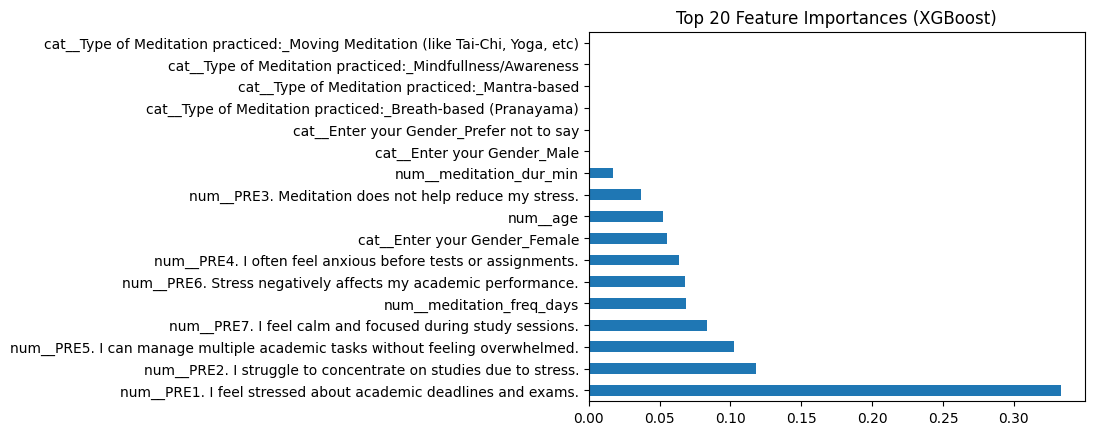

In [27]:
from xgboost import XGBClassifier
import pandas as pd
import matplotlib.pyplot as plt

# Transform data using your existing preprocessing pipeline
X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

# If OneHotEncoder was used, get feature names
try:
    feature_names = preprocessor.get_feature_names_out()
except:
    feature_names = [f"feature_{i}" for i in range(X_train_encoded.shape[1])]

# Convert to DataFrame
X_train_encoded = pd.DataFrame(X_train_encoded, columns=feature_names)
X_test_encoded = pd.DataFrame(X_test_encoded, columns=feature_names)

# Define XGBoost with best params
best_params = {
    'colsample_bytree': 0.8,
    'learning_rate': 0.01,
    'max_depth': 3,
    'min_child_weight': 1,
    'n_estimators': 100,
    'subsample': 1.0,
    'random_state': 42,
    'eval_metric': 'logloss'
}

model = XGBClassifier(**best_params)
model.fit(X_train_encoded, y_train)

# Feature importances
importance = pd.Series(model.feature_importances_, index=feature_names)
importance.nlargest(20).plot(kind='barh')
plt.title("Top 20 Feature Importances (XGBoost)")
plt.show()


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [17:53:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [17:53:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Voting Ensemble Test Results:
Accuracy: 0.662
F1 Score: 0.600
ROC AUC: 0.720


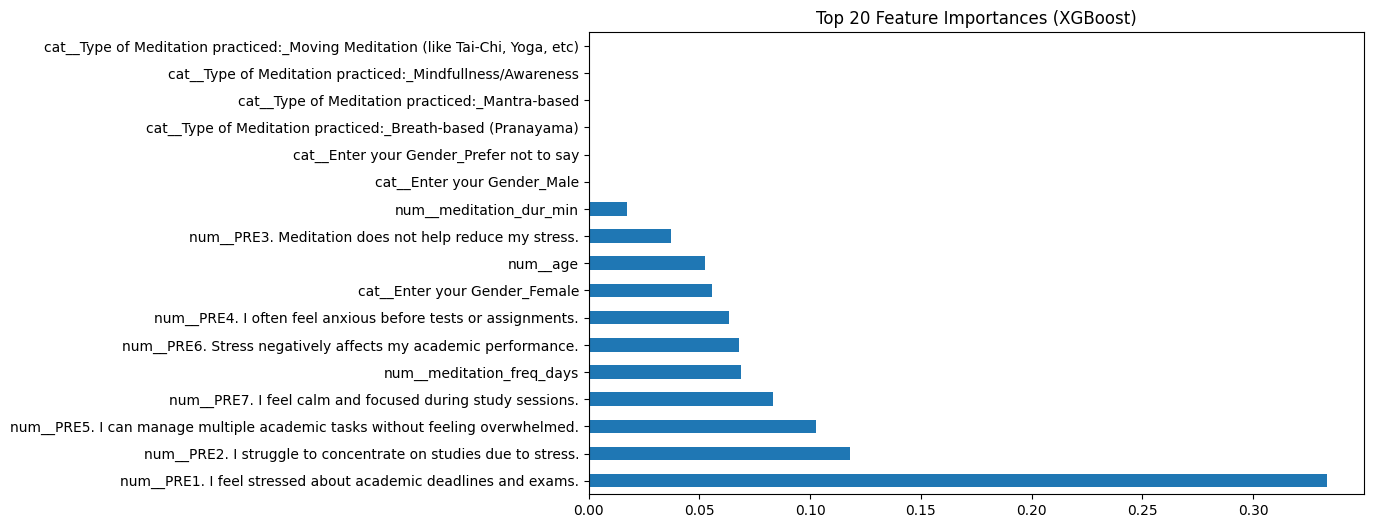

In [31]:
# =====================================================
# MEDITATION & ACADEMIC STRESS ANALYSIS - SAFE ENSEMBLE PIPELINE
# =====================================================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import re

# -------------------------------
# 1️⃣ Load data
# -------------------------------
file_path = "/content/Research Paper Data Collection (UG) - Meditation and Academic Stress - Main.csv"
df = pd.read_csv(file_path, encoding='utf-8', on_bad_lines='skip')

# -------------------------------
# 2️⃣ PRE/POST columns & outcome
# -------------------------------
pre_cols = [c for c in df.columns if c.strip().upper().startswith('PRE')]
post_cols = [c for c in df.columns if c.strip().upper().startswith('POST')]

df[pre_cols] = df[pre_cols].apply(pd.to_numeric, errors='coerce')
df[post_cols] = df[post_cols].apply(pd.to_numeric, errors='coerce')

df['PRE_score'] = df[pre_cols].sum(axis=1)
df['POST_score'] = df[post_cols].sum(axis=1)
df['delta_score'] = df['POST_score'] - df['PRE_score']
df['improved'] = (df['POST_score'] < df['PRE_score']).astype(int)

# -------------------------------
# 3️⃣ Helper functions for meditation features
# -------------------------------
def freq_to_days(val):
    if pd.isna(val): return np.nan
    s = str(val).lower()
    if 'daily' in s or 'everyday' in s: return 7.0
    if '5-6' in s: return 5.5
    if '3-4' in s: return 3.5
    if '1-2' in s: return 1.5
    if 'none' in s or '0' in s or 'never' in s: return 0.0
    if 'rare' in s: return 0.3
    if 'occasional' in s: return 1.5
    if 'frequent' in s: return 4.0
    m = re.search(r'(\d+(\.\d+)?)', s)
    return float(m.group(1)) if m else np.nan

def duration_to_min(x):
    if pd.isna(x): return np.nan
    s = str(x).lower()
    if '<5' in s or 'less than 5' in s: return 2.5
    if '5-15' in s: return 10
    if '15-30' in s: return 22.5
    if '30-60' in s: return 45
    if '>60' in s or 'more than 60' in s: return 75
    m = re.search(r'(\d+)', s)
    return float(m.group(1)) if m else np.nan

# -------------------------------
# 4️⃣ Feature engineering with conditional checks
# -------------------------------
feat_cols = pre_cols.copy()

# Age
age_col = "Enter your age"
if age_col in df.columns:
    df['age'] = pd.to_numeric(df[age_col], errors='coerce')
    feat_cols.append('age')

# Meditation frequency
freq_col = "Frequency of Meditation:"
if freq_col in df.columns:
    df['meditation_freq_days'] = df[freq_col].apply(freq_to_days)
    feat_cols.append('meditation_freq_days')

# Meditation duration
dur_col = "Average Duration of each meditation session:"
if dur_col in df.columns:
    df['meditation_dur_min'] = df[dur_col].apply(duration_to_min)
    feat_cols.append('meditation_dur_min')

# Categorical features
cat_cols = []
gender_col = "Enter your Gender"
type_col = "Type of Meditation practiced:"
for c in [gender_col, type_col]:
    if c in df.columns:
        cat_cols.append(c)
        df[c] = df[c].fillna('Unknown').astype(str)

# Impute numeric features
for c in feat_cols:
    if c in df.columns and df[c].isna().any():
        df[c] = df[c].fillna(df[c].median())

# -------------------------------
# 5️⃣ Prepare X and y
# -------------------------------
model_df = df[feat_cols + cat_cols + ['improved']].copy()
X = model_df[feat_cols + cat_cols]
y = model_df['improved']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# -------------------------------
# 6️⃣ Preprocessing pipeline
# -------------------------------
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, feat_cols),
        ('cat', categorical_transformer, cat_cols)
    ]
)

# -------------------------------
# 7️⃣ Define individual models
# -------------------------------
knn_model = KNeighborsClassifier(n_neighbors=7, weights='distance', metric='manhattan')
rf_model = RandomForestClassifier(n_estimators=200, max_depth=None, class_weight=None, random_state=42)
xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=3,
    learning_rate=0.01,
    subsample=1.0,
    colsample_bytree=0.8,
    min_child_weight=1,
    random_state=42,
    eval_metric='logloss',
    use_label_encoder=False
)

# -------------------------------
# 8️⃣ Voting Ensemble Pipeline
# -------------------------------
ensemble = VotingClassifier(
    estimators=[('knn', knn_model), ('rf', rf_model), ('xgb', xgb_model)],
    voting='soft'
)

ensemble_pipe = Pipeline([
    ('pre', preprocessor),
    ('ensemble', ensemble)
])

# -------------------------------
# 9️⃣ Train ensemble
# -------------------------------
ensemble_pipe.fit(X_train, y_train)

# -------------------------------
# 10️⃣ Evaluate ensemble
# -------------------------------
y_pred = ensemble_pipe.predict(X_test)
y_proba = ensemble_pipe.predict_proba(X_test)[:, 1]

print("✅ Voting Ensemble Test Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.3f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_proba):.3f}")

# -------------------------------
# 11️⃣ Feature importance from XGBoost
# -------------------------------
# Fit XGB on fully processed numeric + one-hot encoded features
X_train_enc = preprocessor.fit_transform(X_train)
X_test_enc = preprocessor.transform(X_test)
feature_names = preprocessor.get_feature_names_out()

xgb_model.fit(X_train_enc, y_train)
importance = pd.Series(xgb_model.feature_importances_, index=feature_names)
importance.nlargest(20).plot(kind='barh', figsize=(10,6))
plt.title("Top 20 Feature Importances (XGBoost)")
plt.show()
